# 1. Random Variables

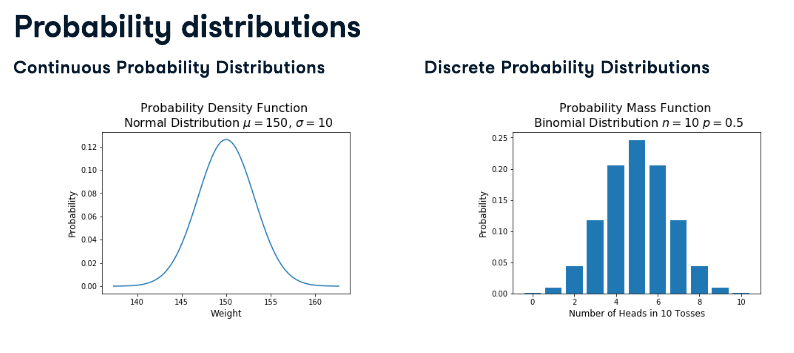

In [2]:
import numpy as np

## Random Poisson Variable

In [3]:
# Initialize seed and parameters
np.random.seed(123) 
lam, size_1, size_2 = 5, 3, 1000  

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)
answer_1 = abs(lam - np.mean(samples_1))
answer_2 = abs(lam - np.mean(samples_2)) 

In [4]:
print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))

|Lambda - sample mean| with 3 samples is 0.33333333333333304 and with 1000 samples is 0.07699999999999996. 


## Shuffle a Deck of Cards

In [6]:
deck_of_cards = [('Heart', 0),
 ('Heart', 1),
 ('Heart', 2),
 ('Heart', 3),
 ('Heart', 4),
 ('Heart', 5),
 ('Heart', 6),
 ('Heart', 7),
 ('Heart', 8),
 ('Heart', 9),
 ('Heart', 10),
 ('Heart', 11),
 ('Heart', 12),
 ('Club', 0),
 ('Club', 1),
 ('Club', 2),
 ('Club', 3),
 ('Club', 4),
 ('Club', 5),
 ('Club', 6),
 ('Club', 7),
 ('Club', 8),
 ('Club', 9),
 ('Club', 10),
 ('Club', 11),
 ('Club', 12),
 ('Spade', 0),
 ('Spade', 1),
 ('Spade', 2),
 ('Spade', 3),
 ('Spade', 4),
 ('Spade', 5),
 ('Spade', 6),
 ('Spade', 7),
 ('Spade', 8),
 ('Spade', 9),
 ('Spade', 10),
 ('Spade', 11),
 ('Spade', 12),
 ('Diamond', 0),
 ('Diamond', 1),
 ('Diamond', 2),
 ('Diamond', 3),
 ('Diamond', 4),
 ('Diamond', 5),
 ('Diamond', 6),
 ('Diamond', 7),
 ('Diamond', 8),
 ('Diamond', 9),
 ('Diamond', 10),
 ('Diamond', 11),
 ('Diamond', 12)]

In [7]:
type(deck_of_cards)

list

In [8]:
# Shuffle the deck
np.random.shuffle(deck_of_cards)

# Print out the top three cards
card_choices_after_shuffle = deck_of_cards[:3]
print(card_choices_after_shuffle)

[('Spade', 11), ('Heart', 10), ('Diamond', 1)]


# 2. Simulation Basics

## Numpy Random Simulation Syntax

In [7]:
#Generate a float between 0 - 1
np.random.uniform(0, 1)

0.8284267235389089

In [9]:
#Generate a uniform random sample from np.arange(5) of size 3:

np.random.choice(5, 3)

array([3, 2, 2])

In [ ]:
#Generate a non-uniform random sample from np.arange(5) of size 3:

np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

In [10]:
#Generate a uniform random sample from np.arange(5) of size 3 without replacement:

np.random.choice(5, 3, replace=False)

array([3, 2, 1])

In [12]:
#Any of the above can be repeated with an arbitrary array-like instead of just integers. For instance:

aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])

array(['rabbit', 'pooh', 'Christopher', 'Christopher', 'Christopher'],
      dtype='<U11')

## Dice Simulation
- Two fair dice. If same number then 1, else 0

In [13]:
# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=num_dice, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]: 
    answer = 'win' 
else:
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))

The dice show 5 and 5. You win!


#### Simulation 100 times and see how many times two dice having the same number

In [14]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=num_dice, p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0] == outcomes[1]: 
        wins = wins + 1 

print("In {} games, you win {} times".format(sims, wins))

In 100 games, you win 19 times


# 3. Use Simulation for Decision Making

### Lottery Ticket Simulation
- Cost 10, 1000 ticket in total only 1 wins, grand prize is 10000
- Simulate 2000 times and calculate the expected outcome

In [18]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost,grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning,chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = np.mean(outcomes)
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = -5.0


In [19]:
# We want to decide the highest price to buy the lottery ticket

# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 9000000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 9


# 4. Probability & Data Generation Process

#### Brithday Puzzle
Now we'll use simulation to solve a famous probability puzzle - the birthday problem. It sounds quite straightforward - How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. Simulation gives us an elegant way of solving this problem. 

In [3]:
#import numpy as np

In [4]:
days = np.array(range(1,366))
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for i in range(sims):
        draw = np.random.choice(days, size=people, replace=True)
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 23 people, there's a 50% chance that two share a birthday.


# 5. Resampling Methods

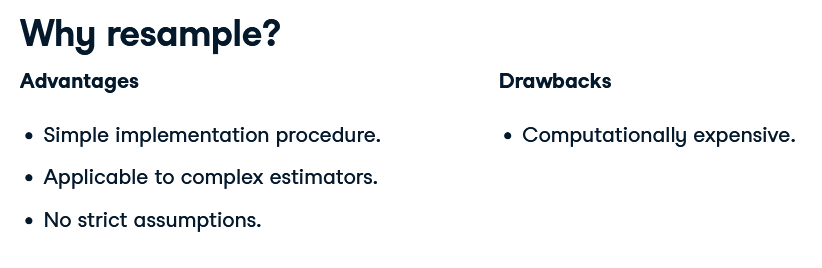

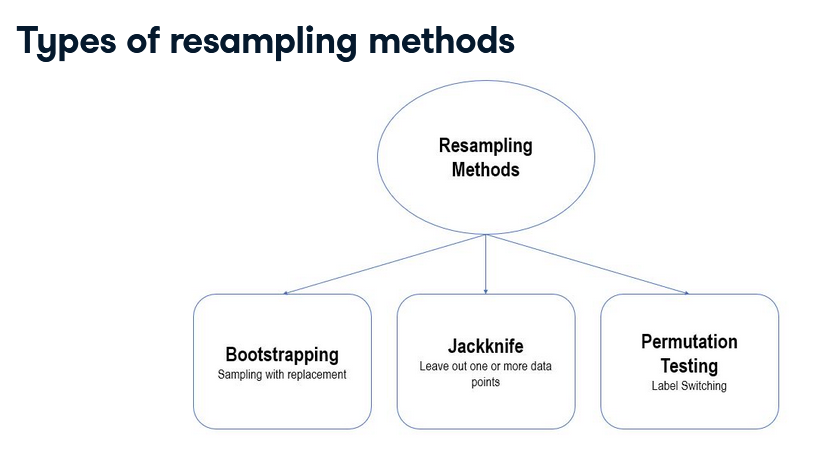

## Boostrapping
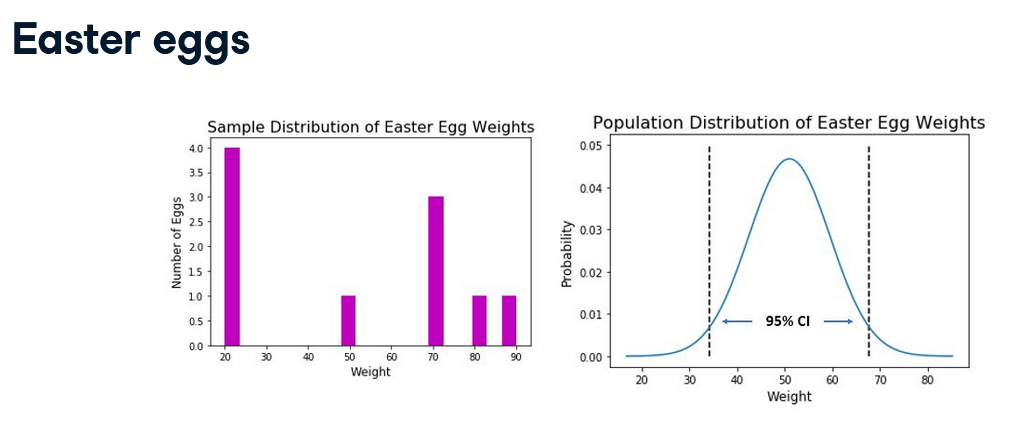
- Sample to population distribution. We want to estimate the 95% CI
- But we need to assume that the weight is normal and confidence interval is symmetric
- It might not be the case! We can use Boostrapping instead
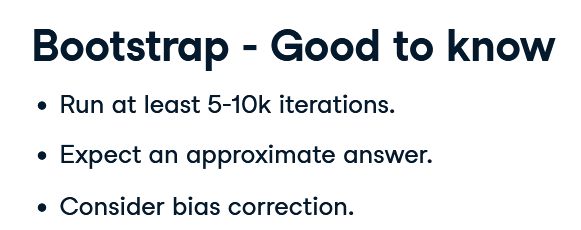

### Wrenches Length CI Estimation
Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

Examine the list wrench_lengths, which has 100 observed lengths of wrenches, in the shell.

In [4]:
wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

In [7]:
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 10000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

#Central Limit Theorem

Bootstrapped Mean Length = 10.02648438552367, 95% CI = [ 9.80619098 10.24549269]


### Sample Rows from a DataFrame
tmp_df = df.sample(n=data_size, replace=True)